<a href="https://colab.research.google.com/github/ShubhamSainger/Income-Qualification-Using-ML/blob/main/Income_Qualification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/ML Project 2/train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This shows that we have to wrangle our categorical variables
data.describe(include = 'O')

,Id,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557,9557
unique,9557,2988,31,22,22
top,ID_bcd33cb7d,fd8a6d014,yes,no,no
freq,1,13,2192,3762,6230


In [ ]:
# idhogar variable in data has 2988 unique categorical values out of 9557 so we should drop this column.
# ID column has 9557 unique categorical values out of 9557 so we should drop this column.

In [ ]:
# In dependency column according to dependency calculation I found that  8 is infinity and 'yes' is 1 and 'no' is 0.

data.dependency.unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [ ]:
# 'yes' is 1 and 'no' is 0.
data.edjefe.unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [ ]:
# 'yes' is 1 and 'no' is 0
data.edjefa.unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [ ]:
# cheaking for null values.
data.isnull().sum().sort_values(ascending = False).head(6)

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
techozinc       0
dtype: int64

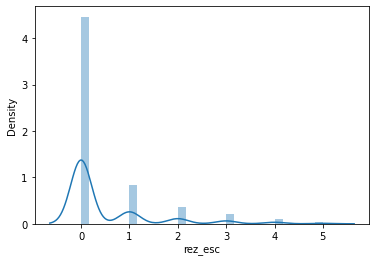

In [ ]:
# Visualizing these coulumns for missing values imputation

sns.distplot(data.rez_esc.dropna())

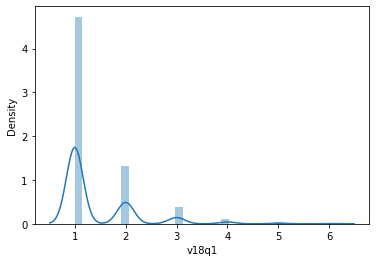

In [ ]:
sns.distplot(data.v18q1.dropna())

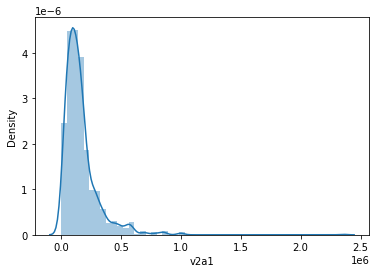

In [ ]:
# this shows that data is right skewed and we should impute missing values to mode

sns.distplot(data.v2a1.dropna())

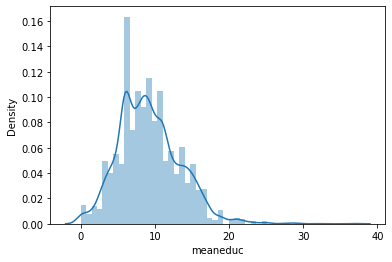

In [ ]:
# this shows that data not too much skewed but it is near to normal distribution so we should impute missing values to mean.

sns.distplot(data.meaneduc.dropna())

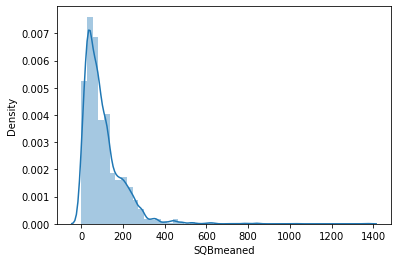

In [ ]:
# this shows that data is right skewed and we should impute missing values to mode.

sns.distplot(data.SQBmeaned.dropna())

In [ ]:
# No. of Houses without family head.
data.loc[data.parentesco1 == 0].Id.count()

6584

In [ ]:
def correlation(data , threshold):
    corr_val = set()
    corr_matrics = data.corr()
    for i in range(len(corr_matrics.columns)):
        for j in range(i):
            if abs(corr_matrics.iloc[i,j]) >= threshold:
                col_name = corr_matrics.columns[i]
                corr_val.add(col_name)
    return corr_val

In [ ]:
corr_col = correlation(data,0.8)

## Feature Engineering

In [ ]:
data['dependency'] = data.dependency.replace(to_replace=['yes','no'], value = [1,0])

In [ ]:
data.dependency = data.dependency.astype('float64')

In [ ]:
# as these are useless they should be removed 

data = data.drop(columns=['idhogar','Id'])

In [ ]:
data['edjefa'],data['edjefe'] = data.edjefa.replace(to_replace = ['yes','no'], value = [1,0]),data.edjefe.replace(to_replace = ['yes','no'], value = [1,0])

In [ ]:
data.edjefa,data.edjefe = data.edjefa.astype('int64'),data.edjefa.astype("int64")

In [ ]:
X = data.drop(columns=['Target'])
y = data.Target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(strategy = 'most_frequent')

In [ ]:
X_train[['v2a1','SQBmeaned']] = imp.fit_transform(X_train[['v2a1','SQBmeaned']])
X_test[['v2a1','SQBmeaned']] = imp.transform(X_test[['v2a1','SQBmeaned']])

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [ ]:
X_train[['meaneduc']] = imp.fit_transform(X_train[['meaneduc']])
X_test[['meaneduc']] = imp.transform(X_test[['meaneduc']])

In [ ]:
X_train = X_train.drop(columns=['rez_esc','v18q1'])
X_test = X_test.drop(columns=['rez_esc','v18q1'])

In [ ]:
X_train = X_train.drop(columns=corr_col)
X_test = X_test.drop(columns=corr_col)

In [ ]:
!pip install feature-engine

In [ ]:
# import feature_engine.outlier_removers

In [ ]:
from feature_engine.outliers import Winsorizer
Winsorizer = Winsorizer()

In [ ]:
X_train = Winsorizer.fit_transform(X_train)
X_test = Winsorizer.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [ ]:
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

## MODELING

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

KNN = KNeighborsClassifier()
RFC = RandomForestClassifier(n_estimators=200)
ETC = ExtraTreesClassifier(n_estimators=100)
GBC = GradientBoostingClassifier(n_estimators=200)

In [ ]:
KNN.fit(X_train,y_train)
RFC.fit(X_train,y_train)
ETC.fit(X_train,y_train)
GBC.fit(X_train,y_train)

KN_Train = KNN.predict(X_train)
RF_Train = RFC.predict(X_train)
ET_Train = ETC.predict(X_train)
GBC_Train = GBC.predict(X_train)


In [ ]:
KN_Test = KNN.predict(X_test)
RF_Test = RFC.predict(X_test)
ET_Test = ETC.predict(X_test)
GBC_Test = GBC.predict(X_test)

In [ ]:
KN_Train_Score = accuracy_score(y_train,KN_Train)
RF_Train_Score = accuracy_score(y_train,RF_Train)
ET_Train_Score = accuracy_score(y_train,ET_Train)
GBC_Train_Score = accuracy_score(y_train,GBC_Train)


In [ ]:
KN_Test_Score = accuracy_score(y_test,KN_Test)
RF_Test_Score = accuracy_score(y_test,RF_Test)
ET_Test_SCore = accuracy_score(y_test,ET_Test)
GBC_Test_SCore = accuracy_score(y_test,GBC_Test)

In [ ]:
print("KNeighborsClassifier train Performance = ",format(KN_Train_Score))
print("KNeighborsClassifier test Performance = ",format(KN_Test_Score))
print("RandomForestClassifier train Performance = ",format(RF_Train_Score))
print("RandomForestClassifier test Performance = ",format(RF_Test_Score))
print("ExtraTreesClassifier train Performance = ",format(ET_Train_Score))
print("ExtraTreesClassifier test Performance = ",format(ET_Test_SCore))
print("GradientBoostingClassifier train Performance = ",format(GBC_Train_Score))
print("GradientBoostingClassifier test Performance = ",format(GBC_Test_SCore))

KNeighborsClassifier train Performance =  0.8611152638660488
KNeighborsClassifier test Performance =  0.74581589958159
RandomForestClassifier train Performance =  1.0
RandomForestClassifier test Performance =  0.903068340306834
ExtraTreesClassifier train Performance =  1.0
ExtraTreesClassifier test Performance =  0.9225941422594143
GradientBoostingClassifier train Performance =  0.8452683510240694
GradientBoostingClassifier test Performance =  0.7737099023709902


In [ ]:
# This shows that ExtraTreeClassifier algorithm is the best for this data.